# MAT281 - Laboratorio N°05



## Problema 01

<img src="http://nelsoncos.com/wp-content/uploads/2017/02/sales-icon.png" width="360" height="360" align="center"/>


EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [80]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sns.set(rc={'figure.figsize':(10,8)})

In [42]:
# cargar datos
df = pd.read_csv(os.path.join("data","company_sales_data.csv"))
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

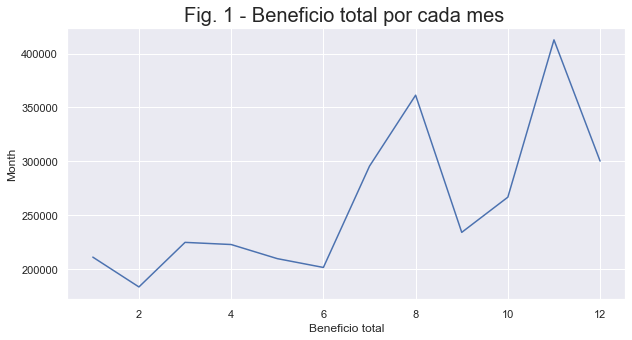

In [34]:
# Gráfico de Líneas
plt.figure(figsize=(10,5)) # Se inicia la figura
sns.lineplot(y=df['total_profit'],x=df['month_number'],palette='rocket') # Se grafica
plt.title("Fig. 1 - Beneficio total por cada mes ", size=20) # Título de la Figura y su tamaño
plt.xlabel('Beneficio total') # Nombre eje x
plt.ylabel('Mes') # Nombre eje y
plt.show() # Mostrar la figura

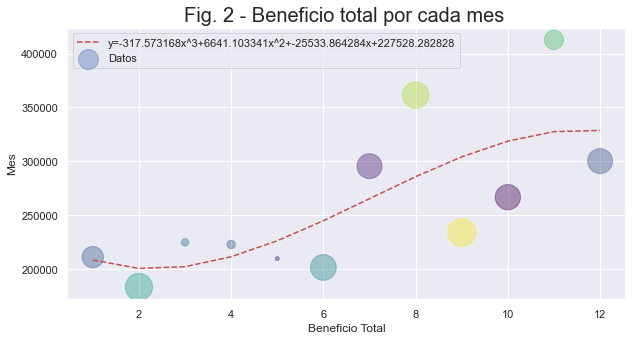

In [102]:
# Gráfico de dispersión
# datos
rng = np.random.RandomState(0)
x = df['month_number']
y = y=df['total_profit']
colors = rng.rand(12)
s = np.random.rand(*x.shape) * 800


# Cacular la línea de tendencia
z = np.polyfit(x, y, 3) # Se ajusta una curva a los datos, se seleccionó un polinomio de grado 3
p = np.poly1d(z) # Se obtienen los puntos evaluados del polinomio


# grafico
fig = plt.figure(figsize=(10, 5)) # ventana
plt.plot(x,p(x),"r--",label='y=%.6fx^3+%.6fx^2+%.6fx+%.6f'%(z[0],z[1],z[2],z[3])) # Se grafica el ajuste.
plt.scatter(
    x, # eje x
    y, # eje y
    s, # tamano de los puntos
    c=colors, # color
    alpha=0.4, # intensidad color
    cmap = 'viridis', # Colores seleccionados
    label="Datos"
)
plt.xlabel("Beneficio Total") # Título eje x
plt.ylabel("Mes") # Título eje y
plt.legend(loc='upper left') # Ubicación de la leyenda
plt.title("Fig. 2 - Beneficio total por cada mes ", size=20) # Título de la Figura y su tamaño
plt.show() # Mostrar la figura



2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

**Por todos los datos se entiende los productos vendidos por mes de forma individual.**

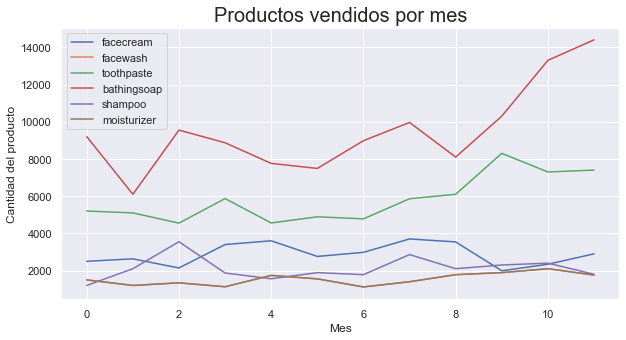

In [38]:
# Se extraen los datos necesarios
df_new = df[['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']]

df_new.plot(figsize=(10,5)) # Se inicia la figura
plt.title("Fig. 3 - Productos vendidos por mes", size=20) # Se le da un título a la Figura y se elige un tamaño de este.
plt.ylabel('Cantidad del producto') # Título eje y
plt.xlabel('Mes') # Título eje x
plt.show() # Mostrar la figura

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

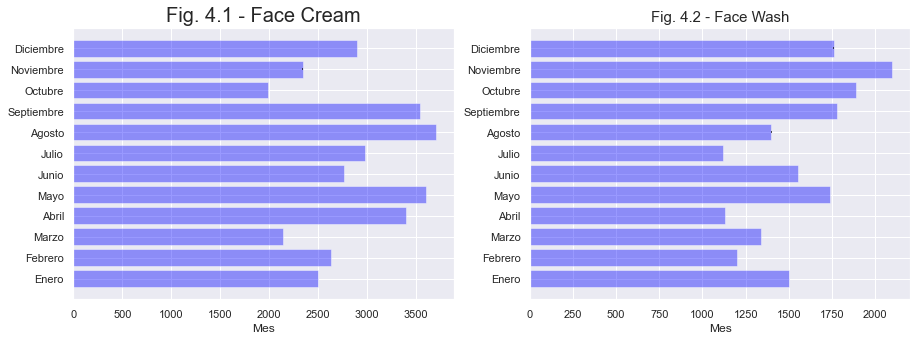

In [104]:
# datos
np.random.seed(0) # fijar semilla
mes = ('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre')
y_pos = df['month_number']
data1 = df['facecream']
data2 = df['facewash']
error = np.random.rand(len(mes))

# grafico
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1) # sub-ventana
plt.barh(
    y_pos, # eje x
    data1, # eje y 
    xerr=error,  # error mostrado en eje x
    align='center', # centrar nombre eje y
    color="blue", # color 
    alpha=0.4 # intensidad del color
)
plt.yticks(y_pos, mes)
plt.xlabel('Mes') # Título eje x
plt.title('Fig. 4.1 - Face Cream', size=20) # Título de la Figura.


plt.subplot(1, 2, 2) # sub-ventana
plt.barh(
    y_pos, # eje x
    data2, # eje y 
    xerr=error,  # error mostrado en eje x
    align='center', # centrar nombre eje y
    color="blue", # color 
    alpha=0.4 # intensidad del color
)
plt.yticks(y_pos, mes)
plt.xlabel('Mes') # Título eje x
plt.title('Fig. 4.2 - Face Wash', size=20) # Título de la Figura.
plt.show()


plt.show()

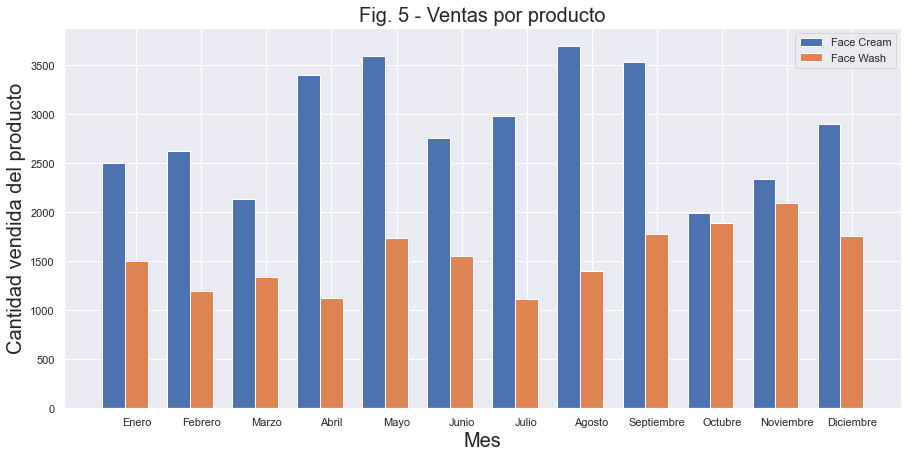

In [110]:
# Se cargan los datos
data1 = df['facecream']
data2 = df['facewash']

numero_de_grupos = len(data1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35

plt.figure(figsize=(15, 7)) # ventana

# Se grafican las barras separadas por el ancho previamente seleccionado.
plt.bar(indice_barras, data1, width=ancho_barras, label='Face Cream')
plt.bar(indice_barras + ancho_barras, data2, width=ancho_barras, label='Face Wash')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, mes)
 
plt.ylabel('Cantidad vendida del producto',size = 20) # Título eje y
plt.xlabel('Mes',size = 20) # Título eje x
plt.title('Fig. 5 - Ventas por producto', size=20) # Título de la Figura y su tamaño
 
plt.show() # Mostrar la figura

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

### Gráfico con matplotlib

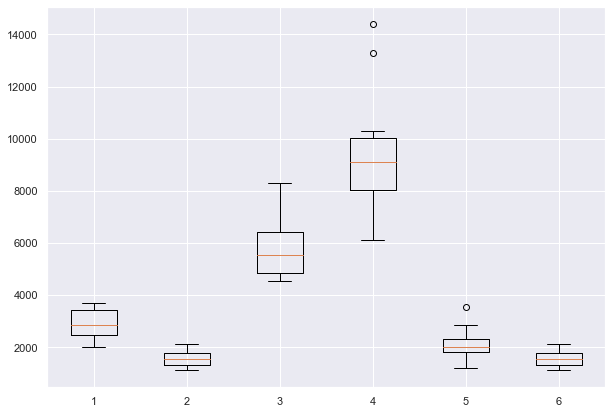

In [118]:
# Se extraen los datos
df_new = df[list(df.columns.values[1:-2])]
sns.set(style="darkgrid")

# Se inicia la figura
fig = plt.figure(figsize =(10, 7))
 
# Se crea el gráfico
plt.boxplot(df_new)
 
# Se muestra el gráfico
plt.show()

### Gráfico con seaborn

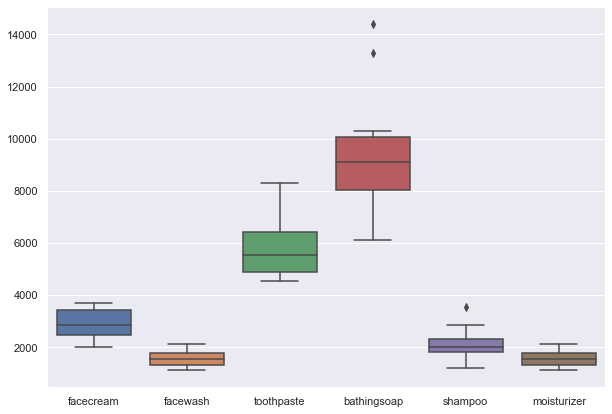

In [117]:
# Se extraen los datos
df_new = df[list(df.columns.values[1:-2])]
sns.set(style="darkgrid")

# Se inicia la figura
fig = plt.figure(figsize =(10, 7))
 
# Se crea el gráfico
sns.boxplot(data=df_new)
 
# Se muestra el gráfico
plt.show()

### Gráfico personalizado

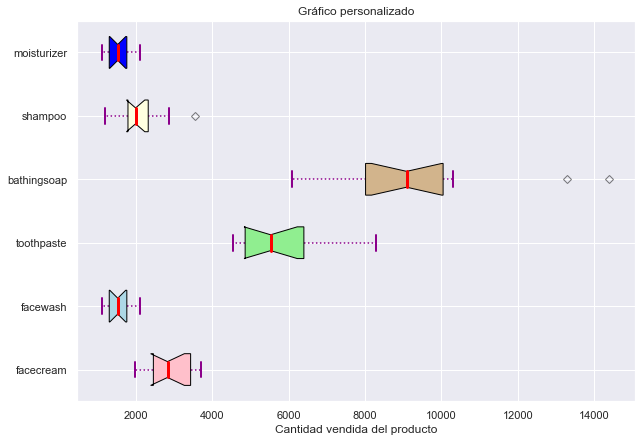

In [121]:
# Personalizaremos el gráfico
data = df[list(df.columns.values[1:-2])]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creando instancia de ejes
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

# Se seleccionan colores
colors = ['pink', 'lightblue', 'lightgreen', 'tan','lightyellow','blue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# cambio de color y ancho de línea de los whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
    
# cambio de color y ancho de línea de las capas
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# Cambio de color y ancho de línea de las medianas.
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# Cambio de estilo de fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# Etiquetas de los ejes
ax.set_yticklabels(list(df.columns.values[1:-2]))
ax.set_xlabel('Cantidad vendida del producto')

# Título
plt.title("Gráfico personalizado")

# Mostrar gráfico
plt.show(bp)

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

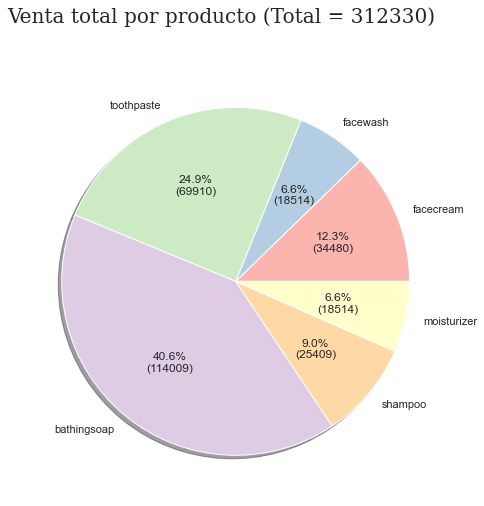

In [123]:
total = df['total_units'].sum() # Se obtiene el total de productos.
producto = list(df.columns.values[1:-2]) # Se obtienen los nombres de los productos
data = df[producto].sum() # Se obtienen los datos asociados a los nombres de productos antes obtenidos

# Se genera una función que me entrege porcertanje y la suma total del producto en ese año
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

cmap = plt.cm.Pastel1 # Se eligen colores pastel
colors = cmap(np.linspace(0., 1., 9)) # Se genera una paleta de colores para el gráfico.

fig, ax  = plt.subplots(figsize=(16, 8)) # Se inicia la figura
# Se le da el Título a la figura
fig.suptitle('Venta total por producto (Total = '+str(total)+')', size = 20, font="Serif", fontsize=20) 
# Se grafica
ax.pie(data, labels=producto, labeldistance = 1.1, colors=colors, shadow = True,autopct=lambda pct: func(pct, data),)

plt.show() # Se muestra el gráfico.